### Loading Dataset and Dataset Description

In [2]:
import pandas as pd

db_data= pd.read_csv('hospitaldata.csv')

db_data

print(db_data.shape)
print(db_data.columns)

(101763, 47)
Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'medical_specialty', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide_metformin', 'glipizide_metformin',
       'glimepiride_pioglitazone', 'metformin_pioglitazone', 'change',
       'diabetesMed', 'readmitted'],
      dtype='object')


### Data Preparation to perform the model testing


In [4]:

# Assigning the binary values to 'readmitted' column(1 - Readmitted_att, 0 - No Readmitted_att)--(Variabe - Readmitted Attribute)
db_data['readmitted_att']= db_data['readmitted'].apply(lambda x: 1 if x in ['Within30Days','After30Days'] else 0)

# Handling the missing values in the rows
db_data.fillna(0, inplace= True)

# descriptive statistics for variables that contains integer value
print("\n Descriptive statistics of columns that contains integer value:")
int_cols=['time_in_hospital','num_lab_procedures','num_procedures','num_medications','number_outpatient','number_emergency',
'number_inpatient','number_diagnoses']
print(db_data[int_cols].describe())




 Descriptive statistics of columns that contains integer value:
       time_in_hospital  num_lab_procedures  num_procedures  num_medications  \
count     101763.000000       101763.000000   101763.000000    101763.000000   
mean           4.396018           43.095909        1.339691        16.021835   
std            2.985092           19.674220        1.705792         8.127589   
min            1.000000            1.000000        0.000000         1.000000   
25%            2.000000           31.000000        0.000000        10.000000   
50%            4.000000           44.000000        1.000000        15.000000   
75%            6.000000           57.000000        2.000000        20.000000   
max           14.000000          132.000000        6.000000        81.000000   

       number_outpatient  number_emergency  number_inpatient  number_diagnoses  
count      101763.000000     101763.000000     101763.000000     101763.000000  
mean            0.369368          0.197842          

In [5]:
# Categorial variable frequency counts

print("\n Categorial columns counts")
categorical_cols= ['readmitted', 'age','gender', 'race']
for i in categorical_cols:
    print(f"\n {i}:")
    print(db_data[i].value_counts())


 Categorial columns counts

 readmitted:
readmitted
No              54861
After30Days     35545
Within30Days    11357
Name: count, dtype: int64

 age:
age
[70-80)     26066
[60-70)     22482
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: count, dtype: int64

 gender:
gender
Female    54708
Male      47055
Name: count, dtype: int64

 race:
race
Caucasian          76099
AfricanAmerican    19210
 Unknown            2271
Hispanic            2037
Other               1505
Asian                641
Name: count, dtype: int64


In [6]:
# Removing the columns that does not have numeric values

non_numeric_cols= db_data.select_dtypes(include=['object']).columns
if len(non_numeric_cols)>0:
    print(f" Removing columns that contains non numeric values: {non_numeric_cols}")
    db_data.drop(non_numeric_cols, axis = 1, inplace = True)

 Removing columns that contains non numeric values: Index(['race', 'gender', 'age', 'weight', 'discharge_disposition_id',
       'admission_source_id', 'medical_specialty', 'diag_1', 'diag_2',
       'diag_3', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide',
       'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide',
       'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
       'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide',
       'examide', 'citoglipton', 'insulin', 'glyburide_metformin',
       'glipizide_metformin', 'glimepiride_pioglitazone',
       'metformin_pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')


### Training and Testing Model

In [8]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

# Featured columns and Targetted columns that will be used in the logistic regression model 
Independent_cols = db_data.drop(['encounter_id', 'patient_nbr','readmitted_att'], axis = 1)
Dependent_cols = db_data['readmitted_att']


# Getting data ready for training and testing.
Independent_cols_train, Independent_cols_test, Dependent_cols_train, Dependent_cols_test = train_test_split(Independent_cols,Dependent_cols,test_size = 0.3, random_state = 42)

# Fitting Logistic Regression model after training and testing-- (Variable - Logistion Regression Model)
log_reg_model= LogisticRegression(max_iter = 1000, random_state = 42)
log_reg_model.fit(Independent_cols_train,Dependent_cols_train)




LogisticRegression(max_iter=1000, random_state=42)

### Making the Predictions

In [10]:
# making the predictions with Logistic Regression model
Dependent_cols_pred = log_reg_model.predict(Independent_cols_test)
Dependent_cols_prob = log_reg_model.predict_proba(Independent_cols_test)[:, 1]

print("Predictions:", Dependent_cols_pred)
print("Prediction Probabilities:", Dependent_cols_prob)

Predictions: [0 0 1 ... 1 0 0]
Prediction Probabilities: [0.49630091 0.47017634 0.56006319 ... 0.61539984 0.38243887 0.33656998]


### Logistic Model Regression Evaluaton

In [12]:
# Model Accuracy

model_accuracy = accuracy_score(Dependent_cols_test,Dependent_cols_pred)
print(f" Regression Model Accuracy: {model_accuracy}")


 Regression Model Accuracy: 0.6173474401388843


In [13]:
# Model Confusion Matrix

model_conf_mat = confusion_matrix(Dependent_cols_test,Dependent_cols_pred)
print(f" Regression Model Confusion Matrix:\n {model_conf_mat}")

 Regression Model Confusion Matrix:
 [[13418  2958]
 [ 8724  5429]]


In [14]:
# Model Classification Report

model_class_report = classification_report(Dependent_cols_test,Dependent_cols_pred)
print(f" Regression Model Classification Report:\n {model_class_report}")

 Regression Model Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.82      0.70     16376
           1       0.65      0.38      0.48     14153

    accuracy                           0.62     30529
   macro avg       0.63      0.60      0.59     30529
weighted avg       0.63      0.62      0.60     30529



In [15]:
# Model Roc Auc

model_roc_auc = roc_auc_score(Dependent_cols_test, Dependent_cols_prob)
print(f" Regression Model Roc_Auc Score: {model_roc_auc}")


 Regression Model Roc_Auc Score: 0.6522152687820117


### Logistic Regression Model Results

In [17]:
# Getting required resuts by using Logistic Regression Model from statsmodel

log_reg_model_summary = sm.Logit(Dependent_cols,Independent_cols)
required_model_result = log_reg_model_summary.fit()

print(required_model_result.summary())

Optimization terminated successfully.
         Current function value: 0.663525
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:         readmitted_att   No. Observations:               101763
Model:                          Logit   Df Residuals:                   101755
Method:                           MLE   Df Model:                            7
Date:                Sat, 22 Mar 2025   Pseudo R-squ.:                 0.03849
Time:                        13:04:40   Log-Likelihood:                -67522.
converged:                       True   LL-Null:                       -70225.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
time_in_hospital       0.0142      0.003      5.613      0.000       0.009       0.019
num_l

### Visuals for Statistical Model 

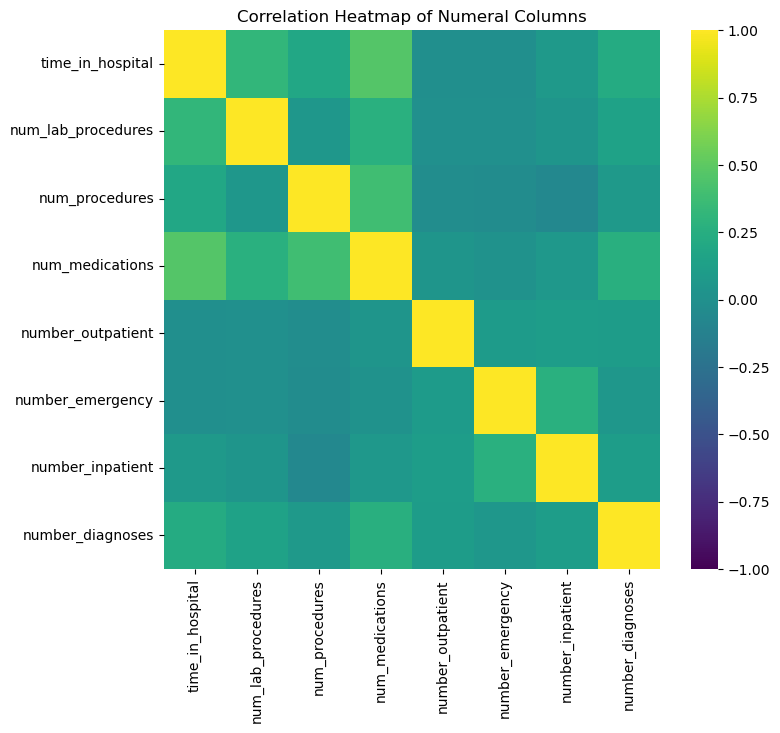

In [19]:
import matplotlib.pyplot as plt
import os 
import seaborn as sns

# fig 1: Correlation Heatmap of Numeral Columns
plt.figure(figsize=(8,7))
corr_matx = Independent_cols.corr()
sns.heatmap(corr_matx, annot = False, cmap = 'viridis', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Numeral Columns')
plt.show()

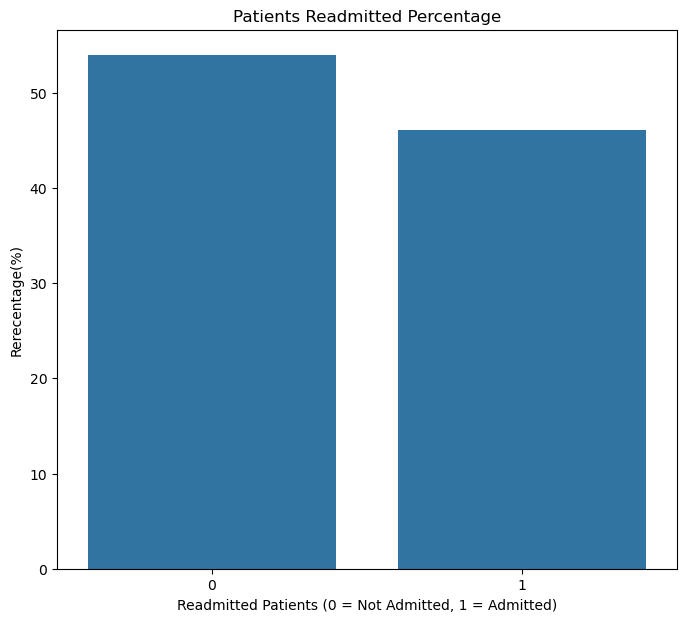

In [20]:
# fig2: Bar Plot- readmitted diaibetes patients

readmitted_patients = db_data['readmitted_att'].value_counts(normalize=True) * 100

plt.figure(figsize=(8,7))
sns.barplot(x=readmitted_patients.index, y=readmitted_patients.values)
plt.title('Patients Readmitted Percentage')
plt.xlabel('Readmitted Patients (0 = Not Admitted, 1 = Admitted)')
plt.ylabel('Rerecentage(%)')
plt.show()

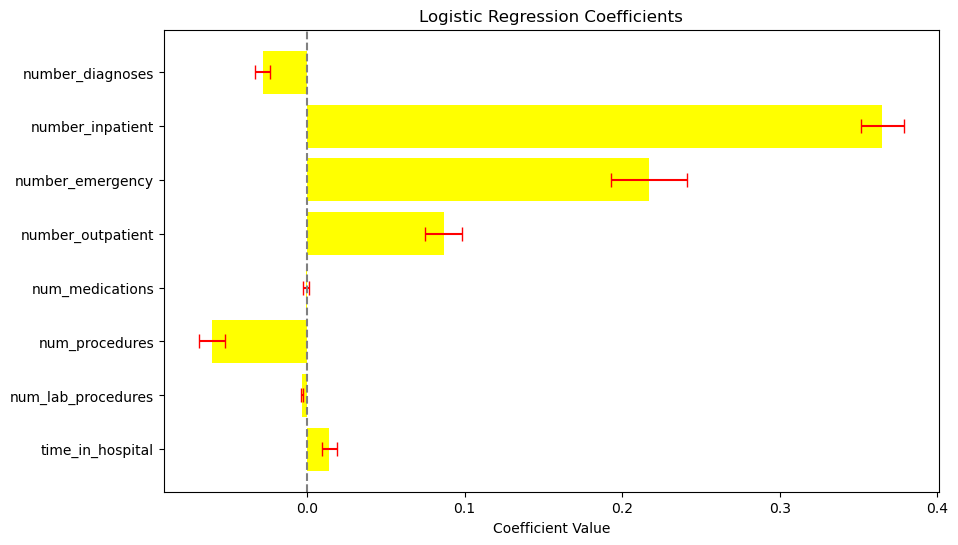

In [21]:
# Fig3: Logistic Regression Coefficients(outputs)

Coeff = required_model_result.params[0:]  
conf_int = required_model_result.conf_int()[0:]  
Error = conf_int[1] - Coeff

plt.figure(figsize=(10, 6))
plt.barh(Coeff.index, Coeff, xerr=Error, capsize=5, color='yellow', ecolor='red')
plt.axvline(x=0, color='gray', linestyle='--')
plt.title('Logistic Regression Coefficients')
plt.xlabel('Coefficient Value')
plt.show()

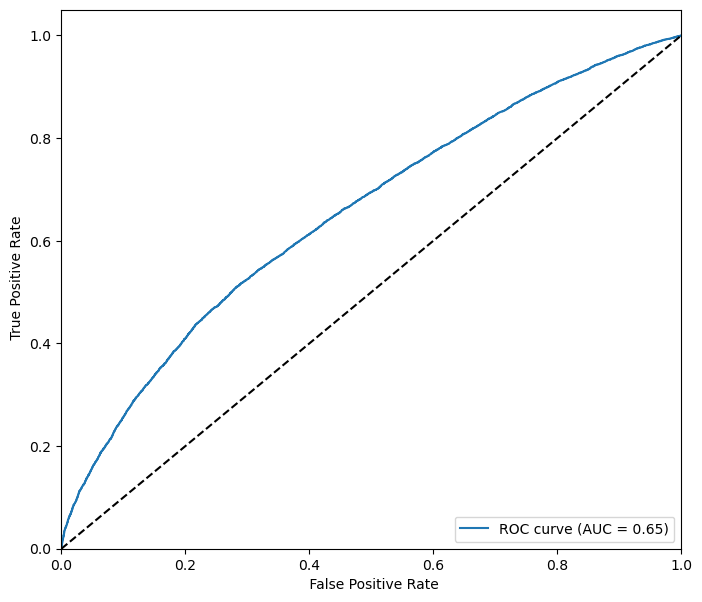

In [22]:
# fig 4:  Roc Curve

fpr,tpr, thresholds = roc_curve(Dependent_cols_test,Dependent_cols_prob)
plt.figure(figsize = (8,7))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {model_roc_auc:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0, 1.05])
plt.xlabel(' False Positive Rate')
plt.ylabel(' True Positive Rate')
# plt.title('
plt.legend(loc = "lower right")
plt.show()

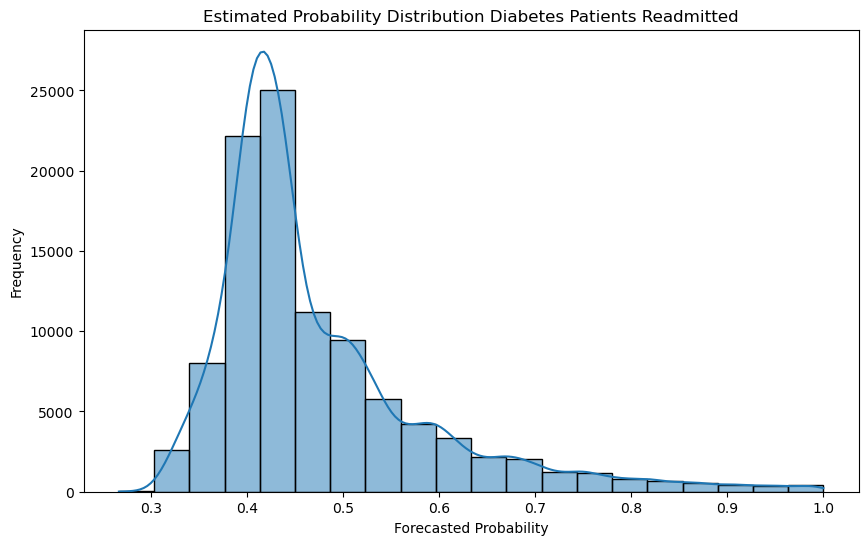

In [23]:
# 5. Actual Readmission vs. Predicted Probabilities 

pred_probabilities = required_model_result.predict(Independent_cols)
plt.figure(figsize=(10, 6))
sns.histplot(pred_probabilities, bins=20, kde=True)
plt.title('Estimated Probability Distribution Diabetes Patients Readmitted')
plt.xlabel('Forecasted Probability')
plt.ylabel('Frequency')
plt.show()